<a href="https://colab.research.google.com/github/abuwildanm/Heart-Disease/blob/master/Heart_Disease_Copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Diagnosis

## Introduction
---



In the field of healthcare, Machine Learning is widely used in various fields of science like to identify the rare diseases, understanding the patterns to predict a rare disease and so on. According to the survey conducted by World Health Organization, 17.9 million total global deaths occur due to heart attacks and strokes in 2016 [[1](https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds))]. The application of algorithms and interpretation of the patterns can be helpful in saving numerous people lives by anticipating the condition of the disease in advance. This project is focused on determining whether the patient has a heart disease or not by taking into consideration the UCI dataset. The dataset originally contained seventy six attributes which were collected from four different databases and fourteen attributes are used for this project [[2](https://www.kaggle.com/ronitf/heart-disease-uci)].

## Import Libraries and Tools

In [3]:
# Import standard library
import numpy as np
import pandas as pd

# Import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neural_network import MLPClassifier

# Import visualization library
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import cufflinks as cf
cf.go_offline()

import IPython
# Plotly Configuration
# Ref : https://stackoverflow.com/questions/47230817/plotly-notebook-mode-with-google-colaboratory
def configure_plotly_browser_state():
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))
IPython.get_ipython().events.register('pre_run_cell', configure_plotly_browser_state)

## Dataset Description
Taken from Kaggle: https://www.kaggle.com/ronitf/heart-disease-uci

---

### Attribute Information:

1. **age**: the patient's age in years
2. **sex**: the patient's gender (1=male; 0=female)
3. **cp**: chest pain type (4 values)
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
4. **trestbps**: the patient's resting blood pressure (mm Hg on admission to the hospital)
5. **chol**: the patient's cholesterol measurement in mg/dl
6. **fbs**: the patient's fasting blood sugar (> 120 mg/dl, 1=true; 0=false)
7. **restecg**: resting electrocardiographic results (3 values)
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. **thalach**: the patient's maximum heart rate achieved
9. **exang**: exercise induced angina (1=yes; 0=no)
10. **oldpeak**: ST depression induced by exercise relative to rest
11. **slope**: the slope of the peak exercise ST segment (3 values)
    - Value 1: upsloping
    - Value 2: flat
    - Value 3: downsloping
12. **ca**: number of major vessels (0-3) colored by flourosopy
13. **thal**: a blood disorder called thalassemia (3=normal; 6=fixed defect; 7=reversable defect)
14. **target**: heart disease (0=no; 1=yes)

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/abuwildanm/Heart-Disease/master/heart.csv')
df = data.copy()
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
feature_discrete = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
feature_continuous = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [6]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Hypothesis
---

To avoid [HARKing](https://journals.sagepub.com/doi/abs/10.1207/s15327957pspr0203_4) (or Hypothesizing After the Results are Known) let's take a look at online guides on how heart disease is diagnosed, and look up some of the terms above.

**Diagnosis**: The diagnosis of heart disease is done on a combination of clinical signs and test results. The types of tests run will be chosen on the basis of what the physician thinks is going on [[1](https://www.mayoclinic.org/diseases-conditions/heart-disease/diagnosis-treatment/drc-20353124)], ranging from electrocardiograms and cardiac computerized tomography (CT) scans, to blood tests and exercise stress tests [[2](https://www.heartfoundation.org.au/your-heart/living-with-heart-disease/medical-tests)].

Looking at information of heart disease risk factors led us to the following: **high cholesterol, high blood pressure, diabetes, weight, family history and smoking** [[3](https://www.bhf.org.uk/informationsupport/risk-factors)]. According to another source [[4](https://www.heart.org/en/health-topics/heart-attack/understand-your-risks-to-prevent-a-heart-attack)], the major factors that can't be changed are: **increasing age, male gender and heredity**. Note that thalassemia, one of the variables in this dataset, is heredity. Major factors that can be modified are: **Smoking, high cholesterol, high blood pressure, physical inactivity, and being overweight and having diabetes**. Other factors include **stress, alcohol and poor diet/nutrition**.

We can see no reference to the 'number of major vessels', but given that the definition of heart disease is **"...what happens when your heart's blood supply is blocked or interrupted by a build-up of fatty substances in the coronary arteries"**, it seems logical the more major vessels is a good thing, and therefore will reduce the probability of heart disease.

Given the above, we would hypothesis that, if the model has some predictive ability, we'll see these factors standing out as the most important.

## Exploratory Data Analysis

### Data Manipulation

In [9]:
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 
                'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 
                'max_heart_rate_achieved', 'exercise_induced_angina', 
                'st_depression', 'st_slope', 'num_major_vessels', 
                'thalassemia', 'target']

col_discrete = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 
                'exercise_induced_angina', 'st_slope', 'num_major_vessels', 
                'thalassemia']
col_continuous = ['age', 'resting_blood_pressure', 'cholesterol', 
                  'max_heart_rate_achieved', 'st_depression']

In [10]:
data = data[data['thalassemia'] > 0]
data.reset_index(drop=True, inplace=True)
df = df[df['thal'] > 0]
df.reset_index(drop=True, inplace=True)

In [11]:
data['sex'][data['sex'] == 0] = 'female'
data['sex'][data['sex'] == 1] = 'male'

data['chest_pain_type'][data['chest_pain_type'] == 0] = 'typical angina'
data['chest_pain_type'][data['chest_pain_type'] == 1] = 'atypical angina'
data['chest_pain_type'][data['chest_pain_type'] == 2] = 'non-anginal pain'
data['chest_pain_type'][data['chest_pain_type'] == 3] = 'asymptomatic'

data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

data['rest_ecg'][data['rest_ecg'] == 0] = 'normal'
data['rest_ecg'][data['rest_ecg'] == 1] = 'ST-T wave abnormality'
data['rest_ecg'][data['rest_ecg'] == 2] = 'left ventricular hypertrophy'

data['exercise_induced_angina'][data['exercise_induced_angina'] == 0] = 'no'
data['exercise_induced_angina'][data['exercise_induced_angina'] == 1] = 'yes'

data['st_slope'][data['st_slope'] == 0] = 'upsloping'
data['st_slope'][data['st_slope'] == 1] = 'flat'
data['st_slope'][data['st_slope'] == 2] = 'downsloping'

data['thalassemia'][data['thalassemia'] == 1] = 'normal'
data['thalassemia'][data['thalassemia'] == 2] = 'fixed defect'
data['thalassemia'][data['thalassemia'] == 3] = 'reversable defect'

In [12]:
df['sex'] = df['sex'].astype('object')
df['cp'] = df['cp'].astype('object')
df['fbs'] = df['fbs'].astype('object')
df['restecg'] = df['restecg'].astype('object')
df['exang'] = df['exang'].astype('object')
df['slope'] = df['slope'].astype('object')
df['ca'] = df['ca'].astype('object')
df['thal'] = df['thal'].astype('object')

### Data Distribution

In [13]:
data[col_discrete].iplot(kind='hist', subplots=True, title='Discrete Attribute Distribution')

In [14]:
data[col_continuous].iplot(kind='hist', subplots=True, title='Continuous Attribute Distribution')

In [15]:
data['target'].iplot(kind='hist', subplots=True, title='Target Distribution')

### Discrete Attribute

In [16]:
def plot_discrete(variable, term):
    cross_table = pd.crosstab(data['target'], data[variable])

    # Visualisation
    x = cross_table.index
    data_bar = []
    for col in cross_table.columns:
        bar = go.Bar(name=col, x=x, y=cross_table[col])
        data_bar.append(bar)

    fig = go.Figure(data=data_bar)
    fig.update_layout(barmode='group', 
                    title='The number of heart disease sufferers in terms of ' + term, 
                    xaxis_title='Diagnosis of Heart Disease (0=no; 1=yes)', 
                    yaxis_title='Frequency')
    fig.show()

In [17]:
plot_discrete('sex', 'Gender')

In [18]:
plot_discrete('chest_pain_type', 'Chest Pain Type')

In [19]:
plot_discrete('fasting_blood_sugar', 'Fasting Blood Sugar')

In [20]:
plot_discrete('rest_ecg', 'Resting ECG Results')

In [21]:
plot_discrete('exercise_induced_angina', 'Exercise Induced Angina')

In [22]:
plot_discrete('st_slope', 'the slope of the peak exercise ST segment')

In [23]:
plot_discrete('num_major_vessels', 'Number of Major Vessels')

In [24]:
plot_discrete('thalassemia', 'Thalassemia')

### Continuous Attribute

In [25]:
trace_splom = go.Splom(dimensions=[dict(label='age', values=data['age']),
                                   dict(label='resting_blood_pressure', values=data['resting_blood_pressure']),
                                   dict(label='cholesterol', values=data['cholesterol']),
                                   dict(label='max_heart_rate_achieved', values=data['max_heart_rate_achieved']),
                                   dict(label='st_depression', values=data['st_depression'])],
                      text=data['target'],
                      marker=dict(color=data['target'],
                                  colorscale='Bluered', 
                                  showscale=False, 
                                  line_color='white', 
                                  line_width=0.5)
                      )
fig = go.Figure(data=trace_splom)
fig.update_layout(title='Continuous Attribute Scatter', width=1000, height=1000)
fig.show()

### Attribute Correlation

In [26]:
# Pearson Product Correlation
corr = data.corr()

hm = go.Heatmap(z=corr, x=corr.index, y=corr.columns, colorscale='RdBu', reversescale=True)
layout = go.Layout(title='Correlation Heatmap')
fig = go.Figure(data=hm, layout=layout)
fig.show()

## Preprocessing

### Duplication Check

In [27]:
df[df.duplicated(keep=False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
162,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [28]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

### Missing Values Check

In [29]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Outlier Detection

In [30]:
box = [go.Box(y=df[col], name=col) for col in df]
layout = go.Layout(title='Outlier Detection')
fig = go.Figure(data=box, layout=layout)
fig.show()

In [31]:
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1

# lowerBound = Q1 - 1.5*IQR
# upperBound = Q3 + 1.5*IQR

# original = df.copy()
# df = df[~((df.iloc[:, :-1] < lowerBound) | (df.iloc[:, :-1] > upperBound)).any(axis=1)]
# df.reset_index(drop=True, inplace=True)

# print('Data dengan outlier              : ', original.shape)
# print('Data setelah outlier dihilangkan : ', df.shape)

### Feature Selection

### Feature Scaling

In [32]:
df = pd.get_dummies(df)
target = df['target'].copy()
df.drop(columns='target', inplace=True)
df['target'] = target
df.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3,target
0,63,145,233,150,2.3,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1
1,37,130,250,187,3.5,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1
2,41,130,204,172,1.4,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1
3,56,120,236,178,0.8,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1
4,57,120,354,163,0.6,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1


In [33]:
mms = MinMaxScaler()
mms_df = mms.fit_transform(df[feature_continuous])
mms_df = pd.DataFrame(data=mms_df, columns=df[feature_continuous].columns)

In [34]:
mms_df.iplot(kind='hist', subplots=True, title='Min-Max Distribution')

In [35]:
ss = StandardScaler()
ss_df = ss.fit_transform(df[feature_continuous])
ss_df = pd.DataFrame(ss_df, columns=df[feature_continuous].columns)

In [36]:
ss_df.iplot(kind='hist', subplots=True, title='Z-Transform Distribution')

In [37]:
# df[feature_continuous] = mms_df.copy()
df[feature_continuous] = ss_df.copy()

## Split the data

In [38]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.3, stratify=df.iloc[:, -1])

## Build Models

### Support Vector Machine

In [39]:
svc = SVC()
svc.fit(x_train, y_train)
print('Train Score : ', svc.score(x_train, y_train))
print('Test Score : ', svc.score(x_test, y_test))

Train Score :  0.919047619047619
Test Score :  0.8888888888888888


In [40]:
cvSVC = pd.DataFrame(cross_validate(svc, df.iloc[:, :-1], df.iloc[:, -1], cv=10, return_train_score=True))
cvSVC

,fit_time,score_time,test_score,train_score
0,0.014350,0.001808,0.900000,0.922222
1,0.006018,0.001447,0.833333,0.918519
2,0.005777,0.001461,0.866667,0.925926
3,0.005804,0.001411,0.966667,0.929630
4,0.005950,0.001453,0.833333,0.925926
5,0.008247,0.001554,0.800000,0.933333
6,0.005909,0.001379,0.866667,0.929630
7,0.005711,0.001444,0.833333,0.929630
8,0.005617,0.001393,0.766667,0.944444
9,0.005923,0.001383,0.766667,0.937037


In [41]:
cvSVC.mean()

fit_time       0.006931
score_time     0.001473
test_score     0.843333
train_score    0.929630
dtype: float64

### Random Forest

In [42]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
print('Train Score : ', rf.score(x_train, y_train))
print('Test Score : ', rf.score(x_test, y_test))

Train Score :  1.0
Test Score :  0.8


In [43]:
cvRF = pd.DataFrame(cross_validate(rf, df.iloc[:, :-1], df.iloc[:, -1], cv=10, return_train_score=True))
cvRF

,fit_time,score_time,test_score,train_score
0,0.148321,0.008872,0.900000,1.0
1,0.141962,0.008795,0.800000,1.0
2,0.141497,0.008708,0.900000,1.0
3,0.143338,0.008785,0.933333,1.0
4,0.139492,0.008976,0.800000,1.0
5,0.138424,0.008724,0.833333,1.0
6,0.138604,0.009111,0.800000,1.0
7,0.137588,0.008791,0.866667,1.0
8,0.138092,0.008842,0.766667,1.0
9,0.149961,0.012196,0.800000,1.0


In [44]:
cvRF.mean()

fit_time       0.141728
score_time     0.009180
test_score     0.840000
train_score    1.000000
dtype: float64

### Multi Layer Perceptron

In [45]:
mlp = MLPClassifier()
mlp.fit(x_train, y_train)
print('Train Score : ', mlp.score(x_train, y_train))
print('Test Score : ', mlp.score(x_test, y_test))

Train Score :  0.9142857142857143
Test Score :  0.9


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [46]:
cvMLP = pd.DataFrame(cross_validate(mlp, df.iloc[:, :-1], df.iloc[:, -1], cv=10, return_train_score=True))
cvMLP

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

,fit_time,score_time,test_score,train_score
0,0.561292,0.002131,0.900000,0.944444
1,0.516000,0.002179,0.833333,0.959259
2,0.471808,0.002211,0.833333,0.951852
3,0.460008,0.002118,0.933333,0.948148
4,0.478090,0.002195,0.900000,0.959259
5,0.468468,0.002211,0.866667,0.955556
6,0.486716,0.002152,0.733333,0.962963
7,0.466106,0.002153,0.833333,0.951852
8,0.469669,0.002151,0.766667,0.955556
9,0.466147,0.002126,0.766667,0.940741


In [47]:
cvMLP.mean()

fit_time       0.484431
score_time     0.002163
test_score     0.836667
train_score    0.952963
dtype: float64

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10,shuffle=True,random_state=0)

KNN = KNeighborsClassifier(n_neighbors = 13)
KNN.fit(x_train, y_train)
print('Train Score : ', KNN.score(x_train, y_train))
print('Test Score : ', KNN.score(x_test, y_test))

Train Score :  0.8380952380952381
Test Score :  0.8777777777777778


In [49]:
cvKNN = pd.DataFrame(cross_validate(KNN, df.iloc[:, :-1], df.iloc[:, -1], cv=10, return_train_score=True))
cvKNN

,fit_time,score_time,test_score,train_score
0,0.005944,0.005630,0.900000,0.855556
1,0.003243,0.003009,0.800000,0.862963
2,0.002682,0.002979,0.833333,0.851852
3,0.002717,0.003082,0.966667,0.844444
4,0.002804,0.003050,0.900000,0.848148
5,0.002812,0.003036,0.733333,0.866667
6,0.002546,0.003036,0.866667,0.855556
7,0.002674,0.003005,0.866667,0.851852
8,0.002925,0.003277,0.766667,0.862963
9,0.002608,0.002986,0.800000,0.855556


In [50]:
cvKNN.mean()

fit_time       0.003095
score_time     0.003309
test_score     0.843333
train_score    0.855556
dtype: float64

### Naive Bayes

In [51]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

nb.fit(x_train, y_train)
print('Train Score : ', nb.score(x_train, y_train))
print('Test Score : ', nb.score(x_test, y_test))

Train Score :  0.7333333333333333
Test Score :  0.6666666666666666


In [52]:
cvnb = pd.DataFrame(cross_validate(nb, df.iloc[:, :-1], df.iloc[:, -1], cv=10, return_train_score=True))
cvnb

,fit_time,score_time,test_score,train_score
0,0.006078,0.001453,0.833333,0.844444
1,0.002376,0.001145,0.800000,0.833333
2,0.002253,0.001136,0.833333,0.851852
3,0.002235,0.001110,0.900000,0.829630
4,0.002203,0.001101,0.833333,0.859259
5,0.002218,0.001102,0.833333,0.848148
6,0.002268,0.001108,0.633333,0.755556
7,0.002324,0.001199,0.900000,0.844444
8,0.002947,0.001119,0.733333,0.814815
9,0.002280,0.001092,0.800000,0.851852


In [53]:
cvnb.mean()

fit_time       0.002718
score_time     0.001157
test_score     0.810000
train_score    0.833333
dtype: float64

### Keras Neural Network

In [54]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers import Dense
import warnings

Using TensorFlow backend.


In [55]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation = "relu", input_dim = 29, units = 11, kernel_initializer = "uniform"))

# Adding the second hidden layer
classifier.add(Dense(activation = "relu", units = 11, kernel_initializer = "uniform"))

# Adding the output layer
classifier.add(Dense(activation = "sigmoid", units = 1, kernel_initializer = "uniform"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [56]:
classifier.fit(x_train, y_train, batch_size = 10, epochs = 100)




Epoch 1/100





210/210 [==============================] - 0s 1ms/step - loss: 0.6929 - acc: 0.5286
Epoch 2/100
210/210 [==============================] - 0s 134us/step - loss: 0.6898 - acc: 0.5429
Epoch 3/100
210/210 [==============================] - 0s 131us/step - loss: 0.6791 - acc: 0.5429
Epoch 4/100
210/210 [==============================] - 0s 120us/step - loss: 0.6536 - acc: 0.6476
Epoch 5/100
210/210 [==============================] - 0s 135us/step - loss: 0.6157 - acc: 0.7333
Epoch 6/100
210/210 [==============================] - 0s 121us/step - loss: 0.5778 - acc: 0.7667
Epoch 7/100
210/210 [==============================] - 0s 118us/step - loss: 0.5486 - acc: 0.7810
Epoch 8/100
210/210 [==============================] - 0s 161us/step - loss: 0.5278 - acc: 0.7905
Epoch 9/100
210/210 [==============================] - 0s 117us/step - loss: 0.5019 - acc: 0.8143
Epoch 10/100
210/210 [==============================] - 0s 134us/step - loss: 0.4794 - acc: 0.8286
Epoch 11/100


In [57]:
y_pred = classifier.predict(x_test)

Accuracy of the model :  0.8888888888888888


Text(0.5, 15.0, 'Predicted label')

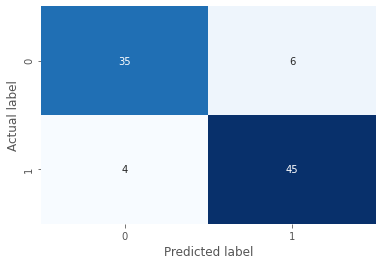

In [58]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm, annot = True, cmap = "Blues", fmt = "d",cbar = False)

#Accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred.round())
print('Accuracy of the model : ', accuracy)

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Model Evaluation

## Conclusion